2) Implement your own linear machine learning model optimized with mini
batch gradient descent methodtopredictthe price of a house inacity with population
 of 160, 000. Train the model to fit the housing prices dataset found on LMS. Vary the
 batch size from 1,5,10, and 20. Plot the objective function, J for each batch size. You do
 not need to split the data into train and test set for this problem. What happens when
 you use batch size equal to one?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm
import itertools
from google.colab import drive
from google.colab import files

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks


Text(0, 0.5, 'Price in $10,000s')

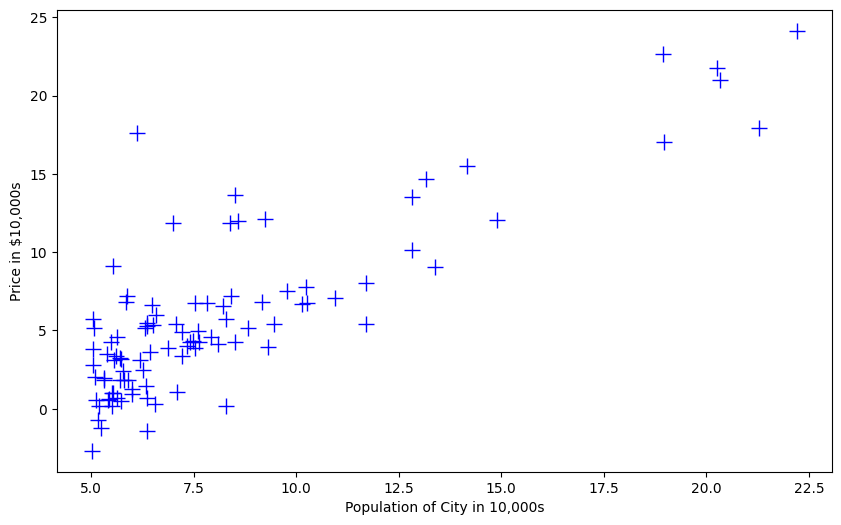

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')
# Go to the current folder
%cd /content/drive/MyDrive/Colab\ Notebooks/


%matplotlib inline
datafile = 'houseprices.txt'
cols = np.loadtxt(datafile,delimiter=',',usecols=(0,1),unpack=True)
X = np.transpose(np.array(cols[:-1]))
y = np.transpose(np.array(cols[-1:]))
m = y.size
X = np.insert(X,0,1,axis=1)

plt.figure(figsize=(10,6))
plt.plot(X[:,1],y[:,0],'b+',markersize=12)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Price in $10,000s')

In [ ]:
from sklearn.model_selection import train_test_split


from sklearn.cluster import KMeans

skmodel = KMeans(
n_clusters=3,
init='k-means++',
n_init='auto',
max_iter=300,
tol=0.0001,
verbose=0,
random_state=None,
copy_x=True,
algorithm='lloyd',
)

kmeans_price = skmodel.fit_predict(X,y)



In [ ]:
def h(w,X):
    return np.dot(X,w)

In [ ]:
def mse(w,X,y):
    return float((1./(2*m)) * np.dot((h(w,X)-y).T,(h(w,X)-y)))

In [ ]:
def predict(xval):
    return w[0] + w[1]*xval

In [ ]:
X.shape

(97, 2)

In [ ]:
from inspect import formatannotation
def gradient_descend(X, batchsize, w_start = np.zeros(2)):

    w = w_start
    J_values = []
    w_store = []

    bin = X.shape[0] // batchsize
    print(bin)

    for b in range(1, bin + 1):

      #Make batches of specificed batch size
      if b != bin:
        X_batch = X[(b-1)*batchsize:(b*batchsize),:]
        y_batch = y[(b-1)*batchsize:(b*batchsize),:]

      #Put in remaining elements left over from division of batches
      else:
        X_batch = X[-X.shape[0]%batchsize-1:-1,:]
        y_batch = y[-X.shape[0]%batchsize-1:-1,:]

      for _ in range(iterations):
          temp_w = w
          J_values.append(mse(w,X_batch,y_batch))
          w_store.append(list(w[:,0]))

          for j in range(len(temp_w)):
              temp_w[j] = w[j] - (alpha/m)*np.sum((h(w,X_batch) - y_batch)*np.array(X_batch[:,j]).reshape(X_batch.shape[0],1))
          w = temp_w

    return w, w_store, J_values

97


<ipython-input-5-db06e19bf99d>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float((1./(2*m)) * np.dot((h(w,X)-y).T,(h(w,X)-y)))
<ipython-input-9-2c5ee836ee2e>:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.plot(X[:,1],predict(X[:,1]),'b-',label = 'Hypothesis: yhat = h(x; w) = %0.2f + %0.2fx'%(w[0],w[1]))


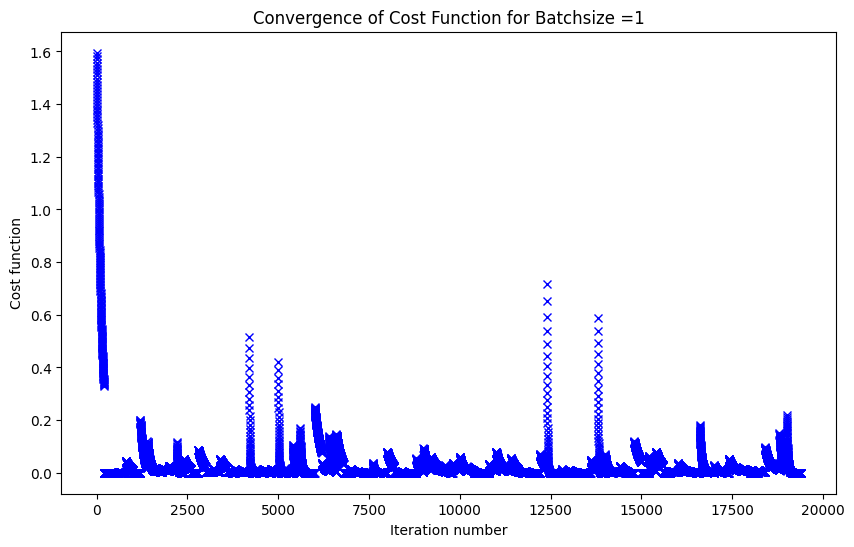

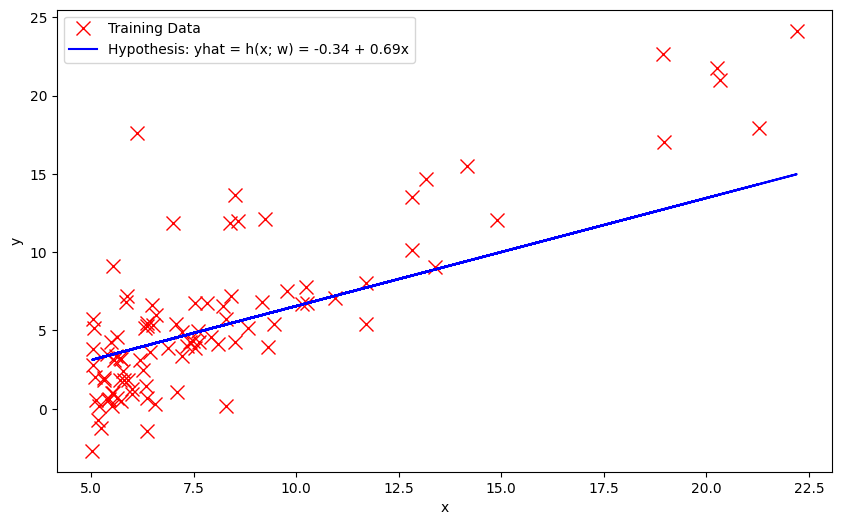

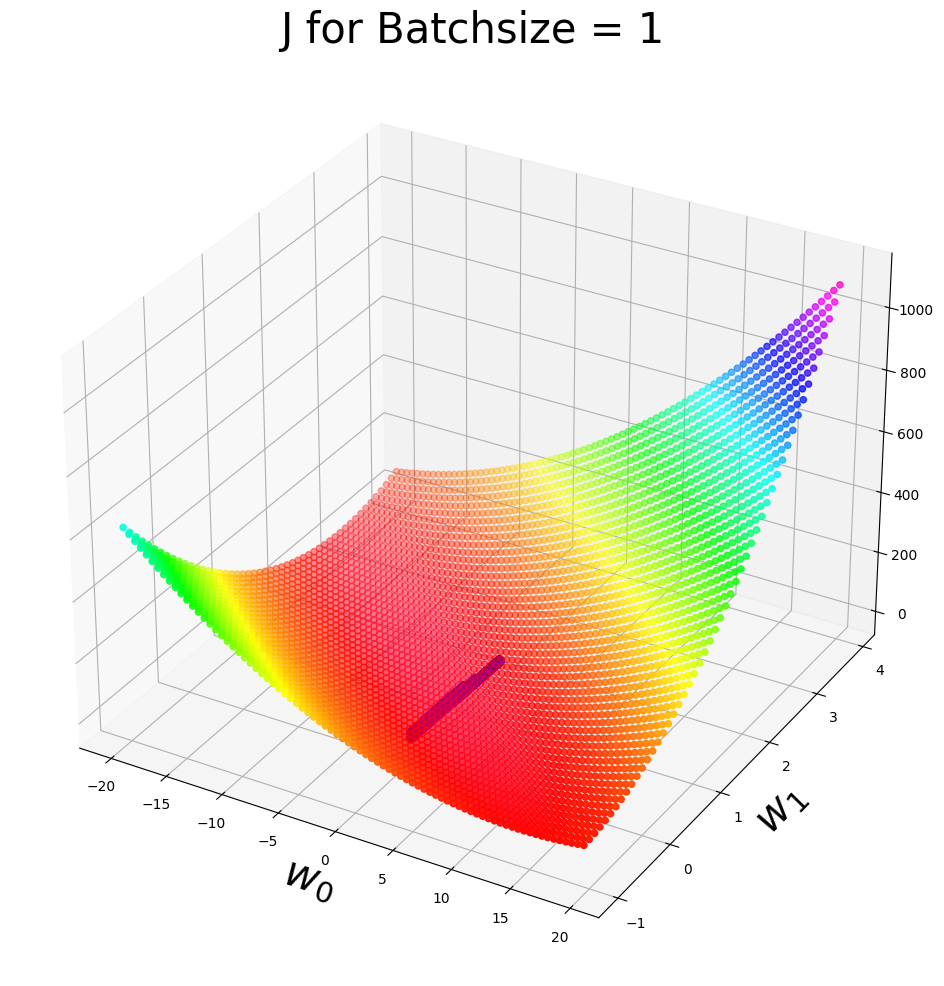

19


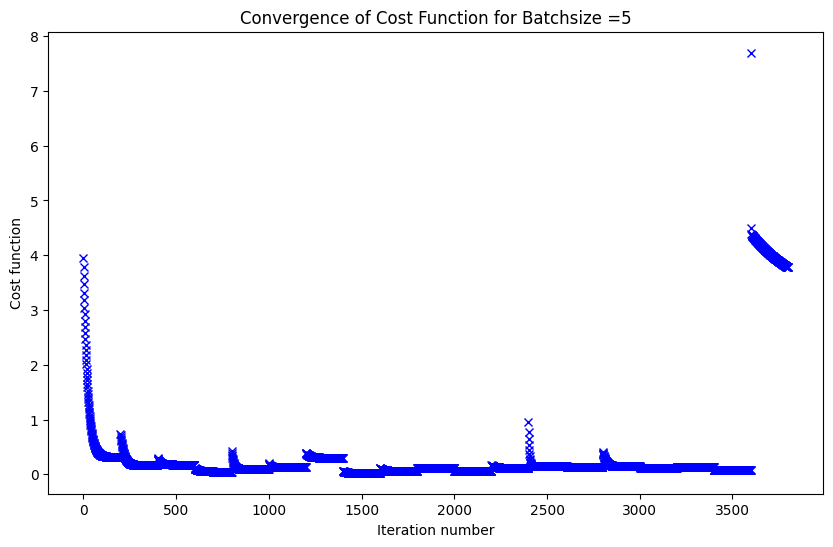

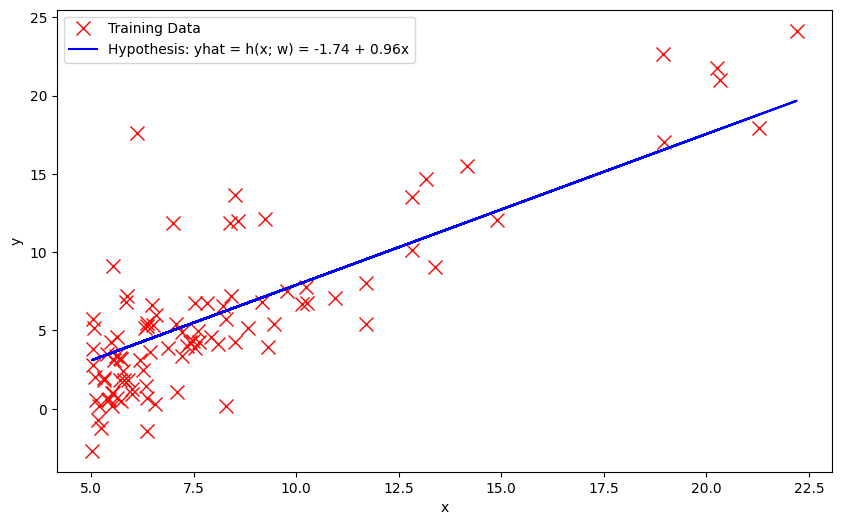

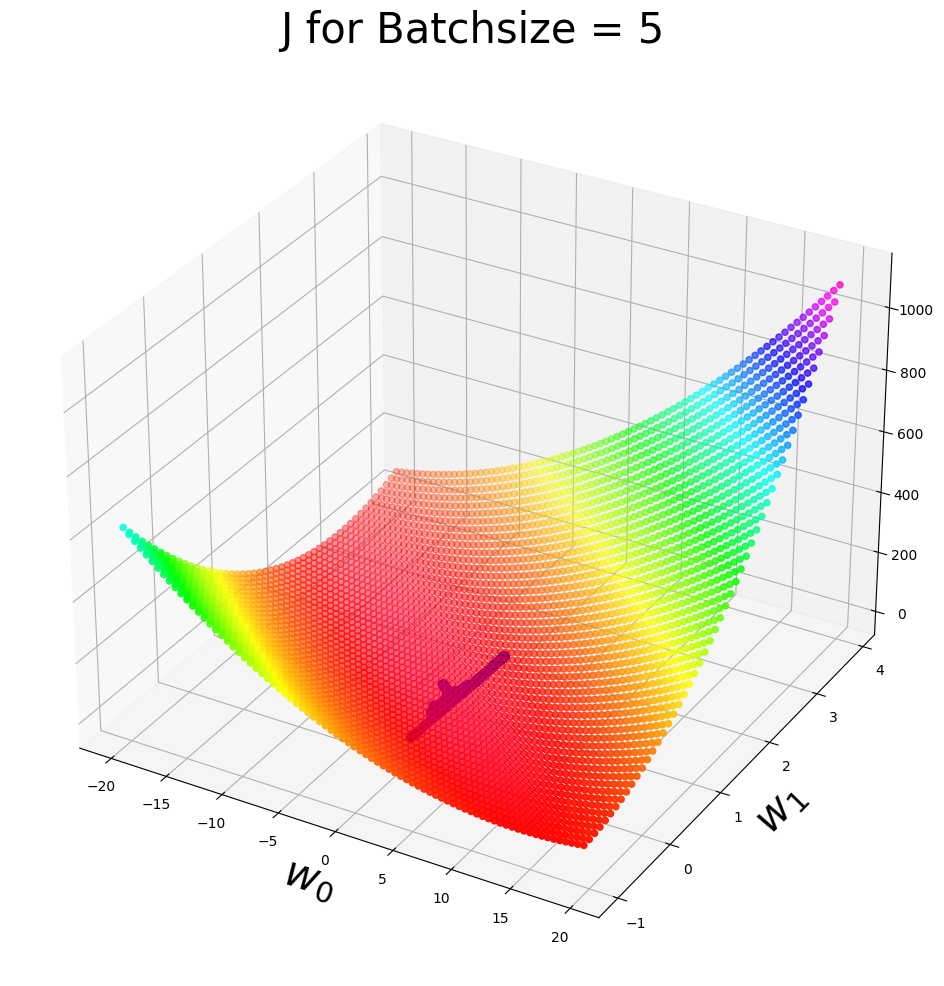

9


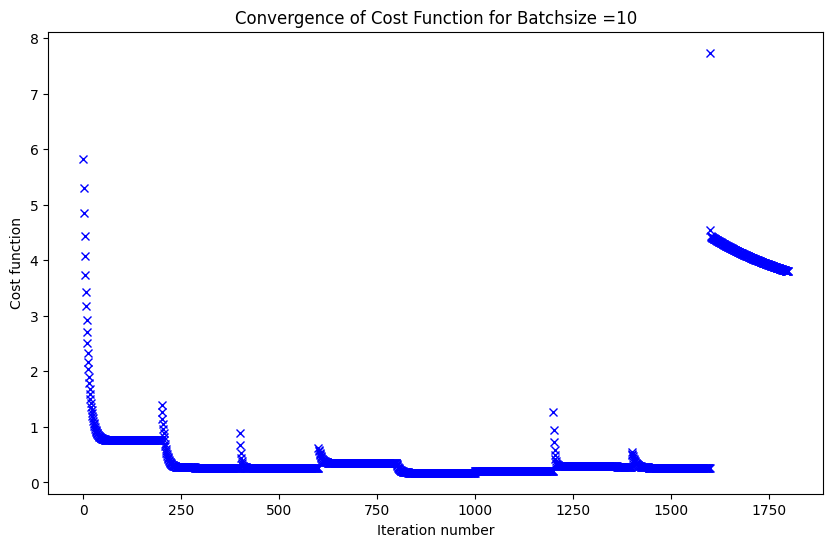

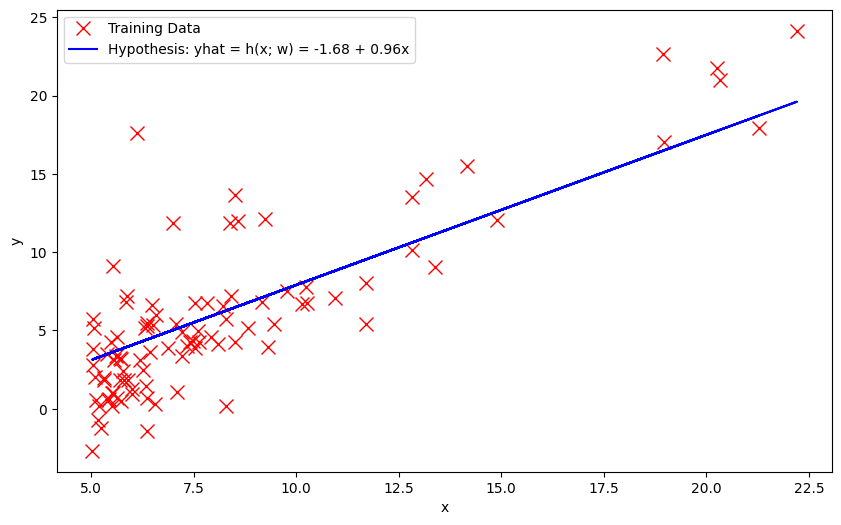

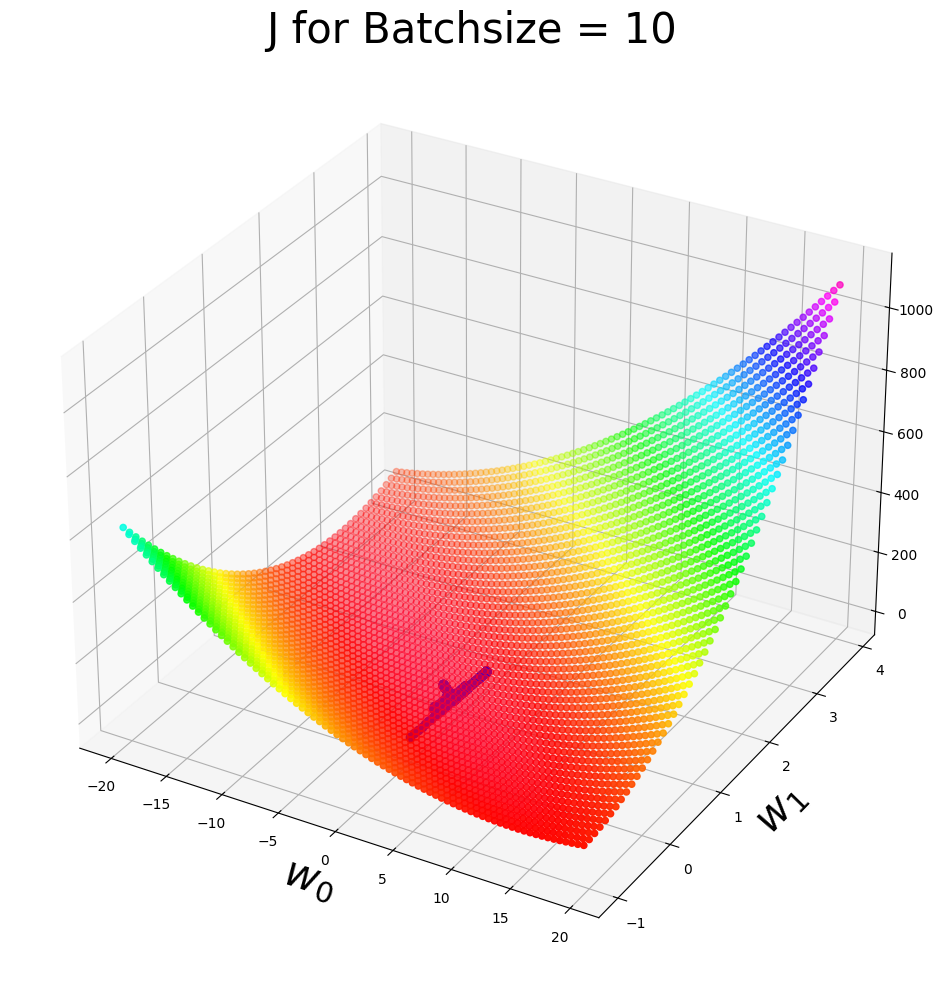

4


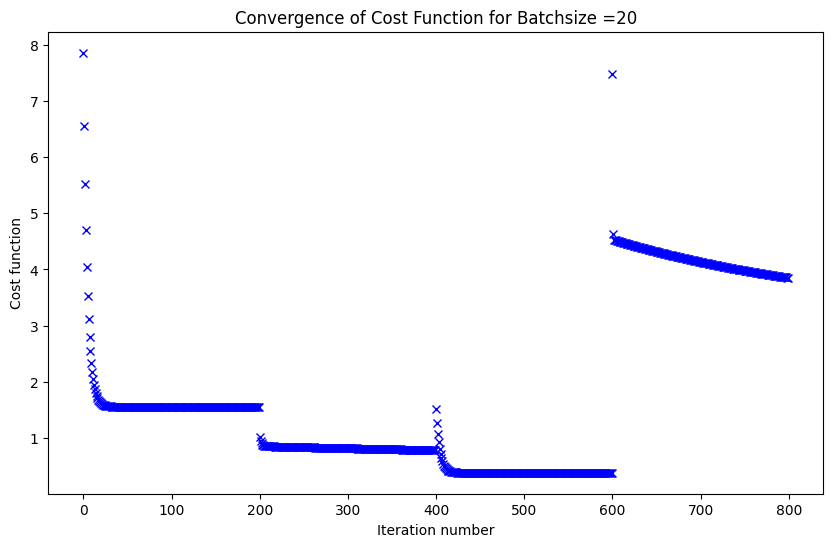

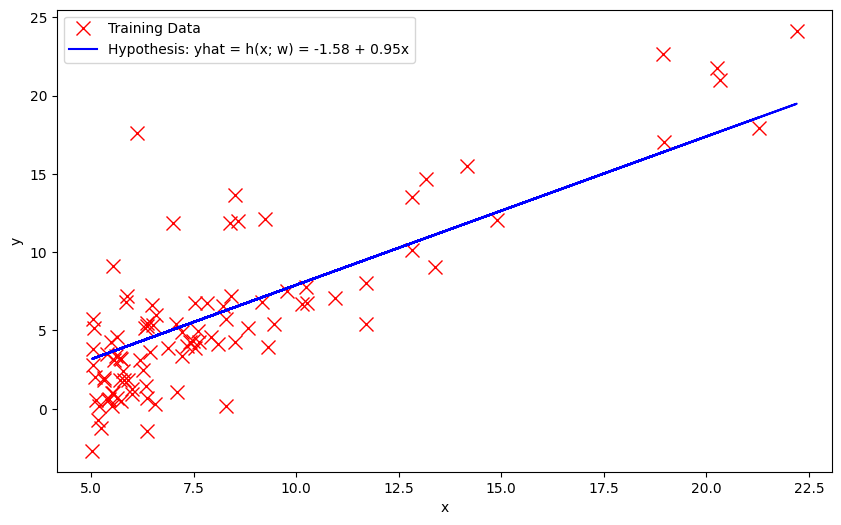

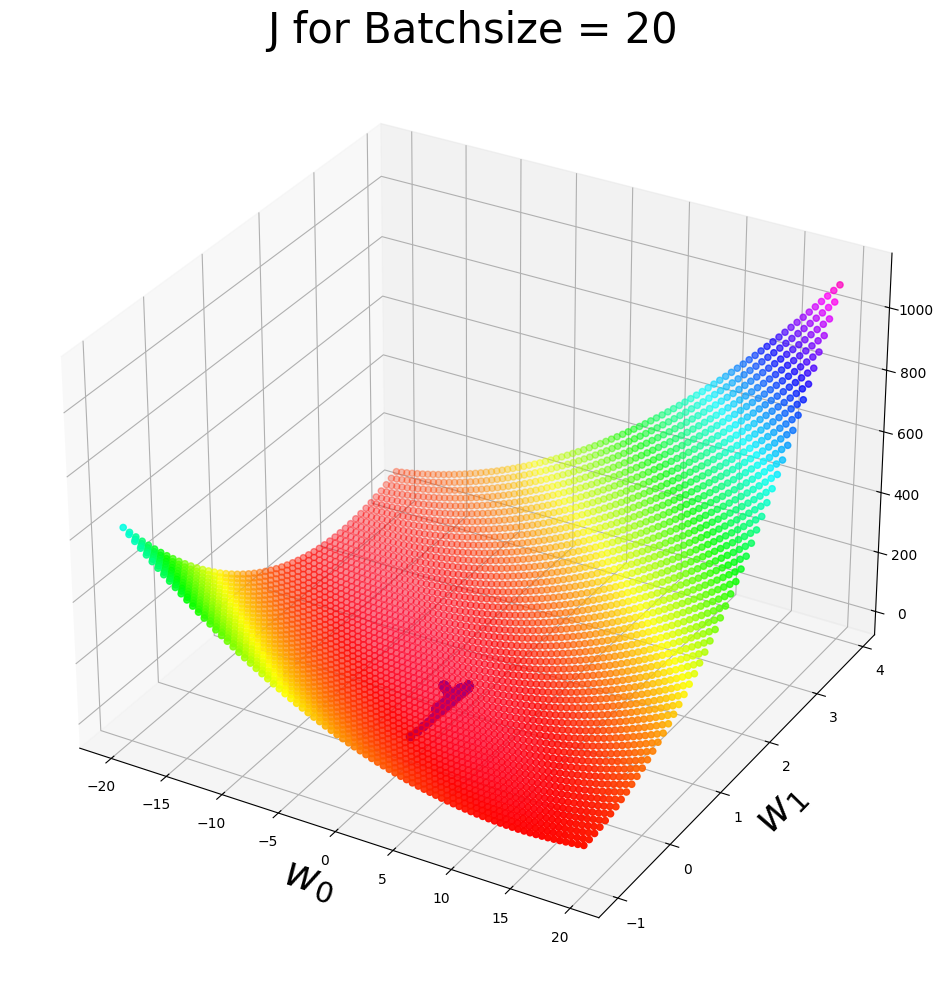

In [ ]:
test_batches = [1,5,10,20]

for batchsize in test_batches:
  iterations = 200
  alpha = 0.01 # learning rate

  w_start = np.zeros((X.shape[1],1))
  w, w_store, J_values = gradient_descend(X, batchsize, w_start)

  plt.figure(figsize=(10,6))
  plt.plot(range(len(J_values)),J_values,'bx')
  plt.title("Convergence of Cost Function for Batchsize =" + str(batchsize))
  plt.xlabel("Iteration number")
  plt.ylabel("Cost function")


  plt.figure(figsize=(10,6))
  plt.plot(X[:,1],y[:,0],'rx',markersize=10,label='Training Data')
  plt.plot(X[:,1],predict(X[:,1]),'b-',label = 'Hypothesis: yhat = h(x; w) = %0.2f + %0.2fx'%(w[0],w[1]))

  plt.ylabel('y')
  plt.xlabel('x')
  plt.legend()

  fig = plt.figure(figsize=(12,12))
  ax = fig.add_subplot(projection = '3d')
  ax = fig.gca()

  xvals = np.arange(-20,20,.5)
  yvals = np.arange(-1,4,.1)
  myxs, myys, myzs = [], [], []
  for _ in xvals:
      for _k in yvals:
          myxs.append(_)
          myys.append(_k)
          myzs.append(mse(np.array([[_], [_k]]),X,y))

  scat = ax.scatter(myxs,myys,myzs,c=np.abs(myzs),cmap=plt.get_cmap('gist_rainbow'))

  plt.xlabel(r'$w_0$',fontsize=30)
  plt.ylabel(r'$w_1$',fontsize=30)
  plt.title('J for Batchsize = ' + str(batchsize), fontsize=30)
  plt.plot([x[0] for x in w_store],[x[1] for x in w_store],J_values,'bo-')
  plt.show()

When the batch size is 1, the data becomes very noisy and seems to have more variation compared to iterations with bigger batch sizes.